In [1]:
!git clone https://github.com/bartsvoboda/NetworksTimeSeries.git

fatal: destination path 'NetworksTimeSeries' already exists and is not an empty directory.


# Nowa sekcja

In [2]:
import numpy as np
import pandas as pd 

In [3]:
data = np.load("/content/NetworksTimeSeries/datasets/dataset_5_12.npy")

In [4]:
time = np.arange(0, 20000)
time

array([    0,     1,     2, ..., 19997, 19998, 19999])

In [5]:
df = pd.DataFrame(dict(traffic = data), index=time, columns = ["traffic"])
df.head()

,traffic
0,177.365
1,177.298
2,177.230
3,177.162
4,177.092


In [6]:
train_size = int(len(df) * 0.7)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

14000 6000


In [7]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [8]:
time_steps = 10

X_train, y_train = create_dataset(train, train.traffic, time_steps)
X_test, y_test = create_dataset(test, test.traffic, time_steps)

print(X_train.shape, y_train.shape)

(13990, 10, 1) (13990,)


In [9]:
X_train[0]

array([[177.365],
       [177.298],
       [177.23 ],
       [177.162],
       [177.092],
       [177.021],
       [176.95 ],
       [176.878],
       [176.804],
       [176.73 ]])

In [10]:
X_train[1]

array([[177.298],
       [177.23 ],
       [177.162],
       [177.092],
       [177.021],
       [176.95 ],
       [176.878],
       [176.804],
       [176.73 ],
       [176.655]])

In [11]:
y_train[0]

176.655

### LSTM

In [12]:
import tensorflow as tf
from tensorflow import keras 

In [13]:
tf.random.set_seed(42)

model = keras.Sequential()
model.add(keras.layers.LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(keras.layers.Dense(1))

model.compile(loss='mae',
              optimizer=keras.optimizers.Adam())

In [14]:
history = model.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=128,
                    validation_data=(X_test, y_test),
                    verbose=1,
                    shuffle=False)

Epoch 1/100
110/110 [==============================] - 5s 10ms/step - loss: 84.6542 - val_loss: 76.2077
Epoch 2/100
110/110 [==============================] - 1s 5ms/step - loss: 71.8005 - val_loss: 66.9920
Epoch 3/100
110/110 [==============================] - 1s 6ms/step - loss: 63.8393 - val_loss: 59.5666
Epoch 4/100
110/110 [==============================] - 1s 5ms/step - loss: 56.9982 - val_loss: 53.8352
Epoch 5/100
110/110 [==============================] - 1s 6ms/step - loss: 51.3227 - val_loss: 47.9775
Epoch 6/100
110/110 [==============================] - 1s 5ms/step - loss: 45.7928 - val_loss: 42.7452
Epoch 7/100
110/110 [==============================] - 1s 5ms/step - loss: 41.1266 - val_loss: 38.5628
Epoch 8/100
110/110 [==============================] - 1s 6ms/step - loss: 37.2859 - val_loss: 35.2217
Epoch 9/100
110/110 [==============================] - 1s 5ms/step - loss: 33.9552 - val_loss: 31.4597
Epoch 10/100
110/110 [==============================] - 1s 6ms/step - lo

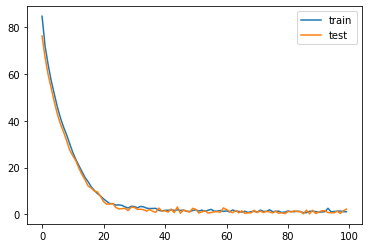

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [16]:
# history_2 = model.fit(X_train,
#                     y_train,
#                     epochs=30,
#                     batch_size=16,
#                     validation_split=0.1,
#                     verbose=1,
#                     shuffle=False)

In [17]:
y_pred = model.predict(X_test)

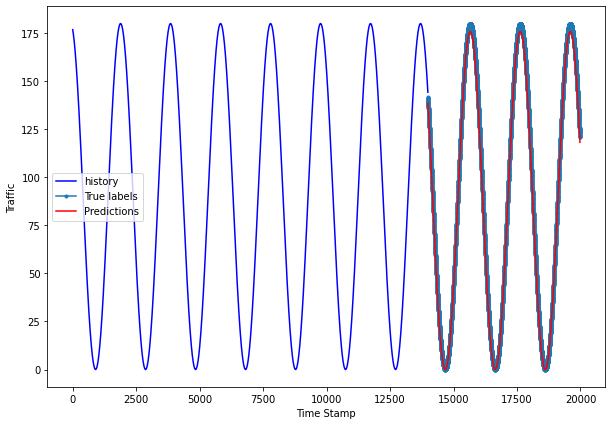

In [18]:
plt.figure(figsize=(10, 7))
plt.plot(np.arange(0, len(y_train)), y_train, 'b', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker=".", label="True labels")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="Predictions")
plt.ylabel("Traffic")
plt.xlabel("Time Stamp")
plt.legend()
plt.show();

In [19]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_true=y_test, y_pred=y_pred)

1.3383960828265344

## Polynomial

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

degree=2
X_train = tf.squeeze(X_train)
X_test = tf.squeeze(X_test)
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [25]:
y_pred_pr = polyreg.predict(X_test)

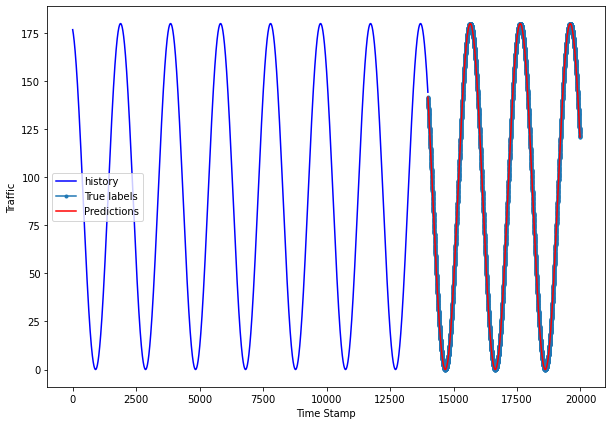

In [26]:
plt.figure(figsize=(10, 7))
plt.plot(np.arange(0, len(y_train)), y_train, 'b', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker=".", label="True labels")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_pr, 'r', label="Predictions")
plt.ylabel("Traffic")
plt.xlabel("Time Stamp")
plt.legend()
plt.show();

In [27]:
mean_absolute_percentage_error(y_true=y_test, y_pred=y_pred_pr)

0.00026697201938270766